# Прогнозирование конечных свойств новых композиционных материалов  

Предоставленный dataset со свойствами композитов необходимо объеденить по индексу типа объединения <b>INNER</b>

<b>Задачи:</b>
<p>1.Обучить алгоритм машинного обучения, который будет определять значения:
<b><p>* Модуль упругости при растяжении, ГПа</p>
<p>* Прочность при растяжении, МПа<b></p></p> 
<p>2.Написать нейронную сеть, которая будет рекомендовать:
<p>* <b>Соотношение матрица-наполнитель</b><p> </p> 

In [41]:
#Подключаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from tensorflow import keras
from keras import layers

<p> <b>Разведочный анализ данных </b> </p>


In [26]:
#загружаем файлы из dataset X_bp.xlsx, X_nup.xlsx

path_bp = 'C:/Users/Alexey/PycharmProjects/VKR_Mastiugin/data/X_bp.xlsx'
path_nup = 'C:/Users/Alexey/PycharmProjects/VKR_Mastiugin/data/X_nup.xlsx'

data_bp = pd.read_excel(path_bp,index_col=0)
data_nup = pd.read_excel(path_nup,index_col=0)

print('Строк в  bp - ', data_bp.shape)
print('Строк в nup - ', data_nup.shape)

Строк в  bp -  (1023, 10)
Строк в nup -  (1040, 3)


In [27]:
# файлы из dataset имееют разную длину строк.
# выводим первые 5 строк из X_bp.xlsx и X_nup.xlsx
data_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [28]:
data_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [29]:
#Объединяем данные по индексу, тип INNER
dataset = pd.merge(data_bp,data_nup,how='inner',left_index=True,right_index=True)
print('Строк в объединенном dataset - ', dataset.shape)
dataset.head()

Строк в объединенном dataset -  (1023, 13)


Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

In [30]:
#В объединенном dataset получили 13 призанков, для наглядности их выводим на печать
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [7]:
#Подсчитываем количество уникальных значений по каждому из признаков
dataset.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [31]:
#Для признака "Угол нашивки, град" подсчитаем количество вхождений значений
dataset['Угол нашивки, град'].value_counts()

0     520
90    503
Name: Угол нашивки, град, dtype: int64

<b>Описательная статистика признаков</b>

In [32]:
#Выводим описательную статистику (количество строк, среднее значение, стандартное отклонение, миним., макс. значения)
description = dataset.describe().T
description['median'] = dataset.median()
description

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max       median  
Соотношение матрица-наполнитель          3.552660     5.591742     2.906878  
Плотность, кг/м3                      2021.374375  2207.773481  1977.621657  
модуль упругости, ГПа                  961.812526  1911.536477   739.664328  
Количество отвердителя, м.%            129.730366   198.953207   110.564840  
Содержание эпоксидных групп,%_2         23.961934    33.000000    22.230744  
Температура вспышки, С_2               313.002106   413.273418   285.896812  
Поверхностная плотность, г/м2          693.225017  1399.542362   451.864365  
Модуль упругости при растяжении, ГПа    75.356612    82.682051    73.268805  
Прочность при растяжении, МПа         2767.193119  3848.436732  2459.524526  
Потребление смолы, г/м2                257.481724   414.590628   219.198882  
Угол нашивки, град                      90.000000    90.000000     0.000000  
Шаг нашивки                              8.586293    14.440522     6.916144  
Плотность нашивки                       64.944961   103.988901    57.341920

In [33]:
#Проверяем есть ли пропуски в датасете
dataset.isna().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [34]:
#количество пропусков - 0

In [35]:
#Для визуализации статистики удалим столбец count
del description['count']

<b>Гистограмма распределения и диаграмма размаха</b>

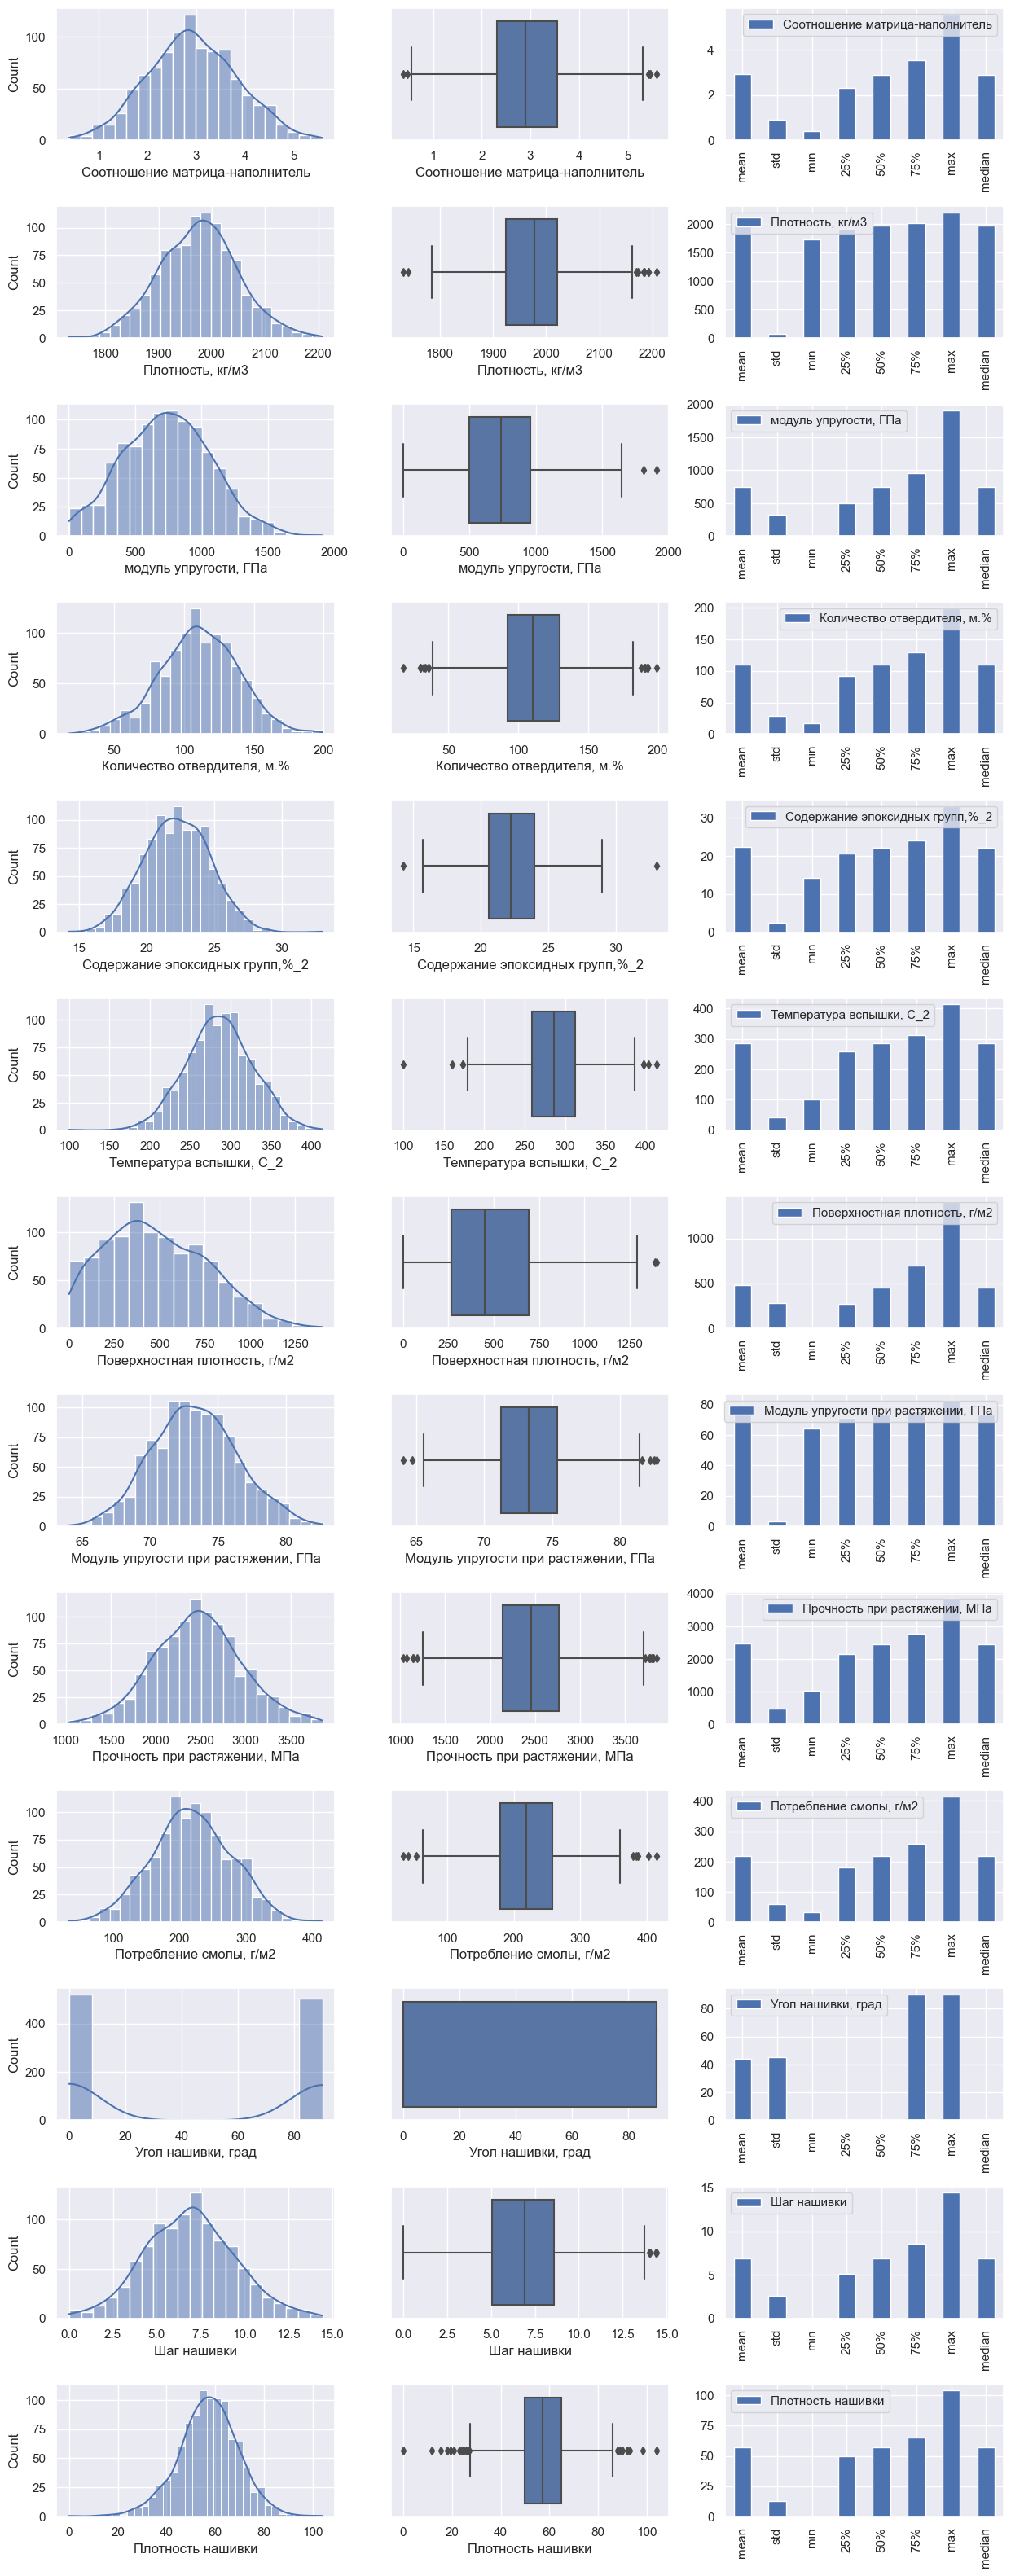

In [43]:
#Построим гистограмму распределения и диаграмму размаха ("ящик с усами") для каждого признака, также выведем статистику описательную
fig, axes = plt.subplots(13, 3, figsize=(15, 40))
plt.subplots_adjust(hspace=0.5)
sns.set(style="darkgrid")
for index, col in enumerate(dataset.columns):    
    col_des = pd.DataFrame(description.loc[col,:])
    sns.histplot(data=dataset, x=col, kde=True, ax=axes[index, 0])
    sns.boxplot(data=dataset, x=col, ax=axes[index, 1])
    col_des.plot(kind='bar', ax=axes[index, 2])    
plt.show()

<b>Попарные графики рассеяния точек</b>

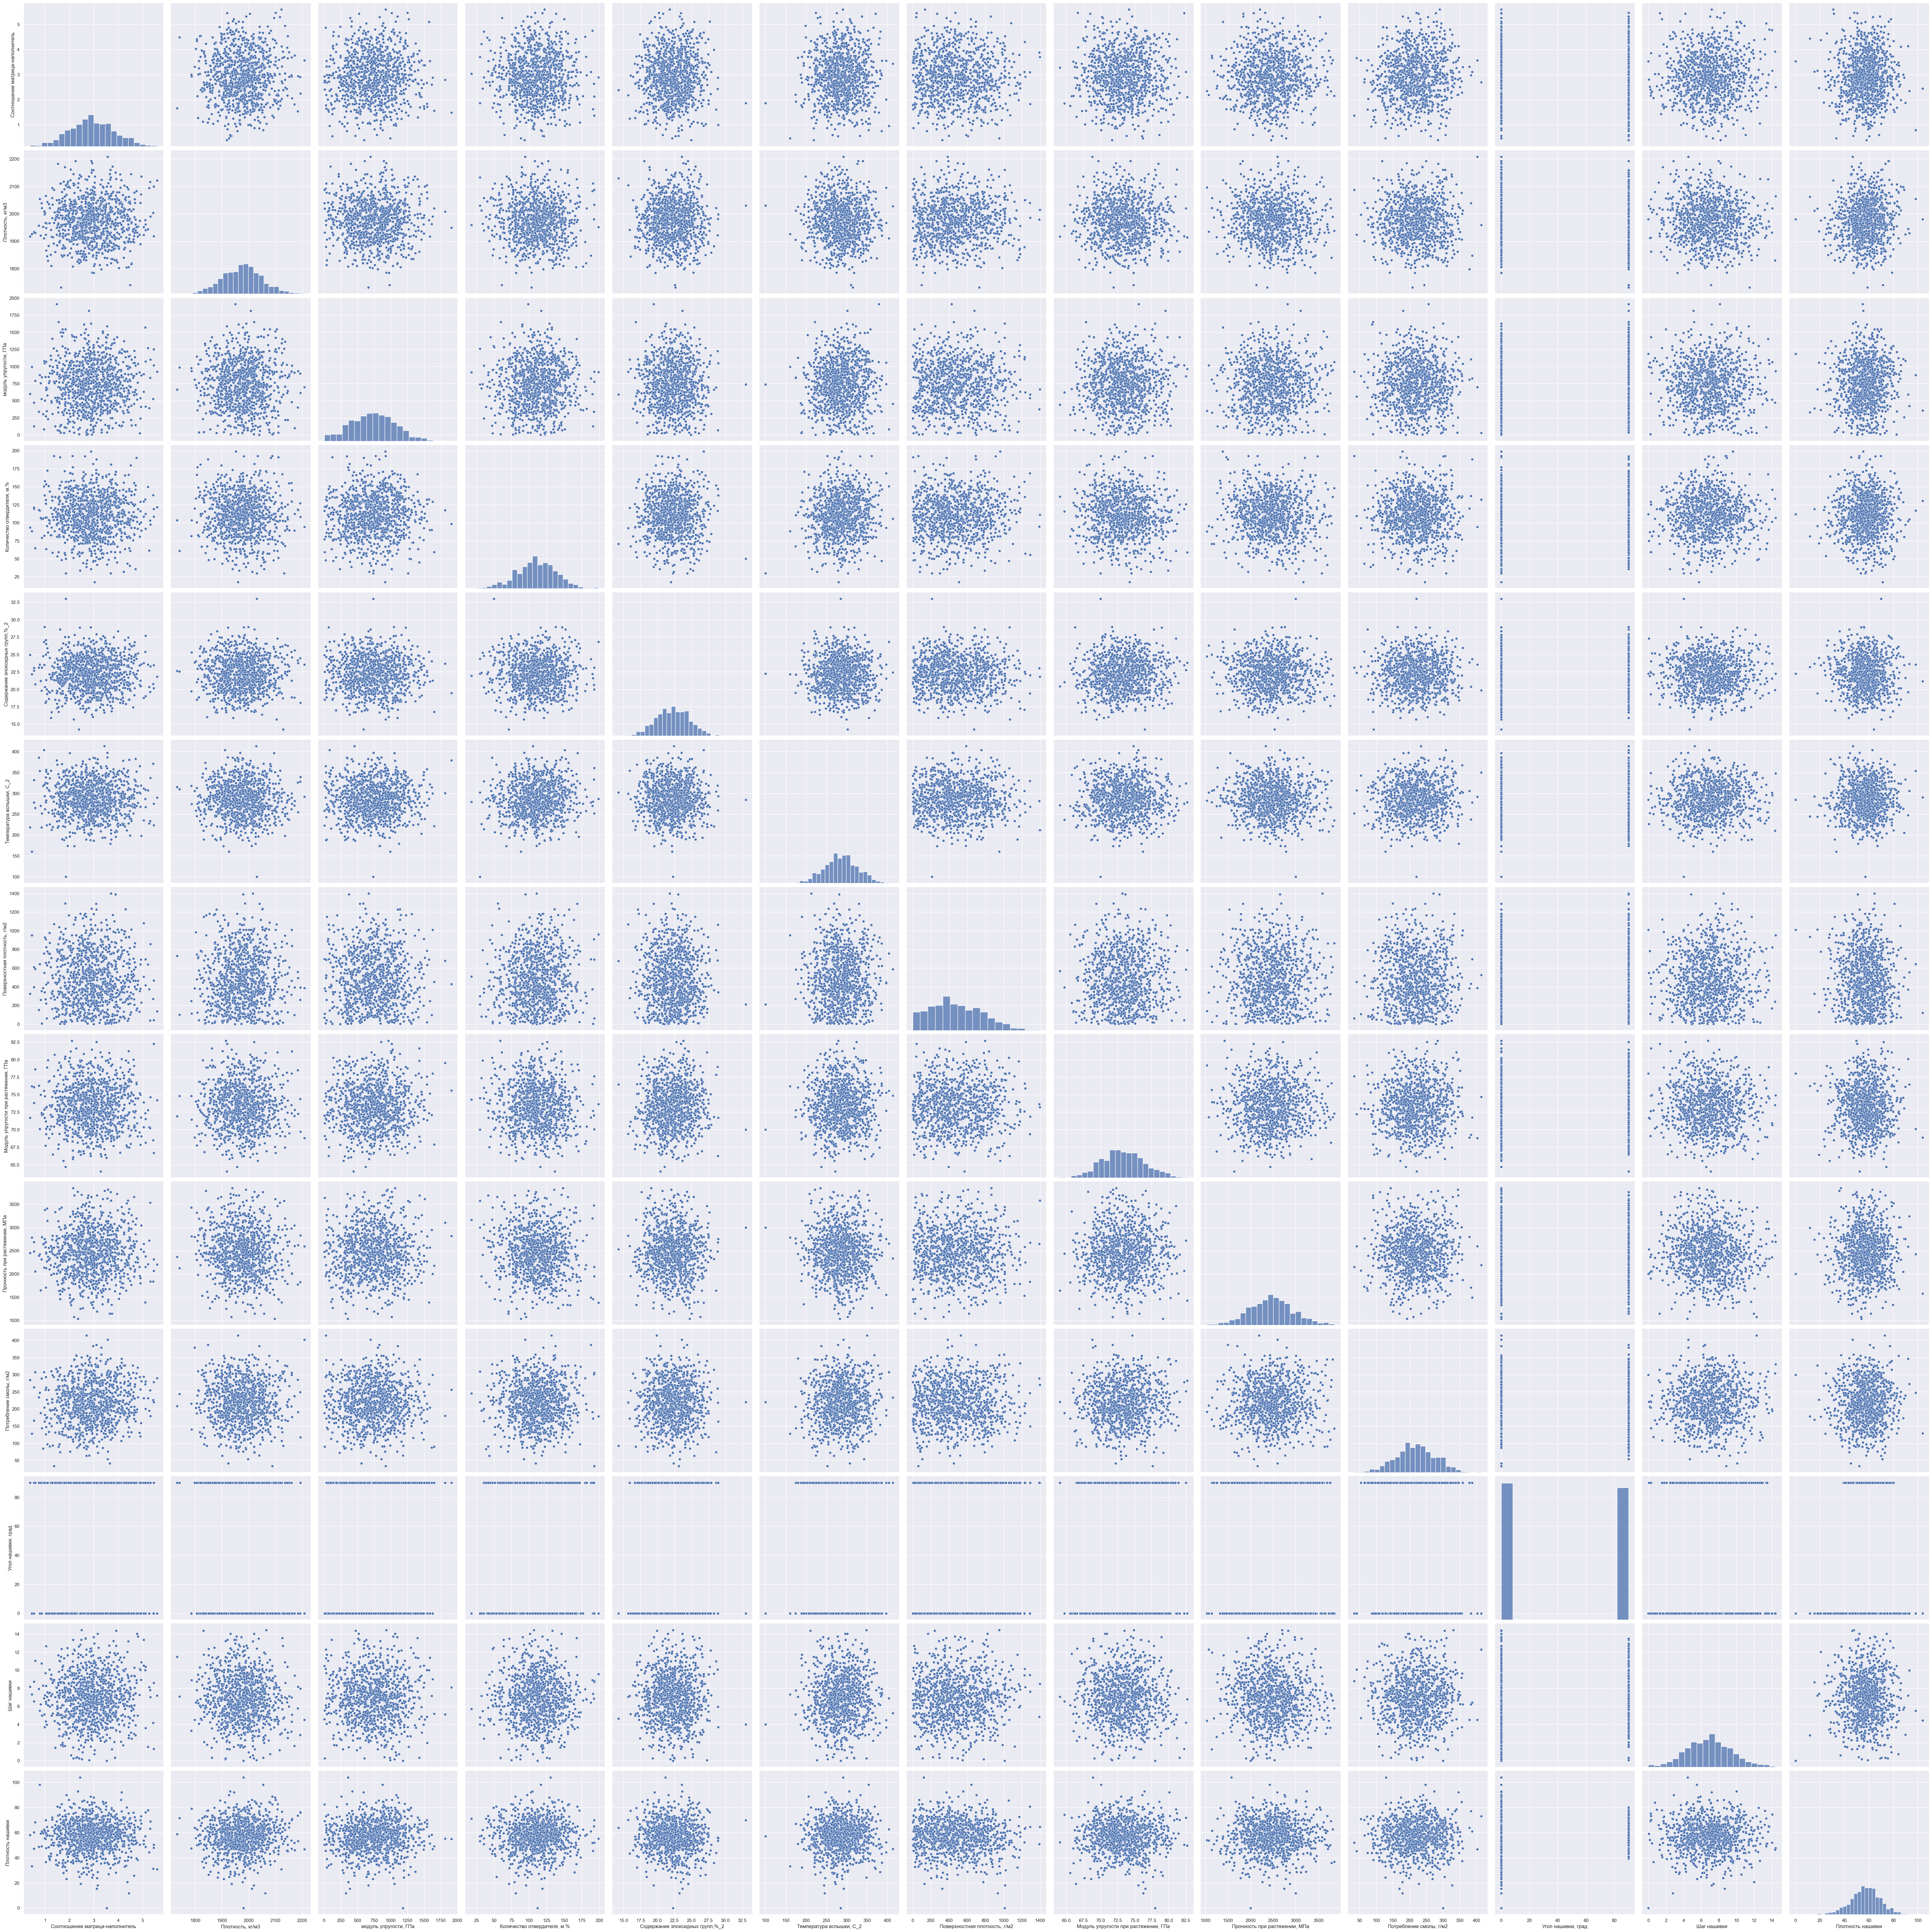

In [44]:
# Построим матрицу диаграмм рассеяния
sns.pairplot(dataset, height=5)

<b>Матрица корреляции</b>

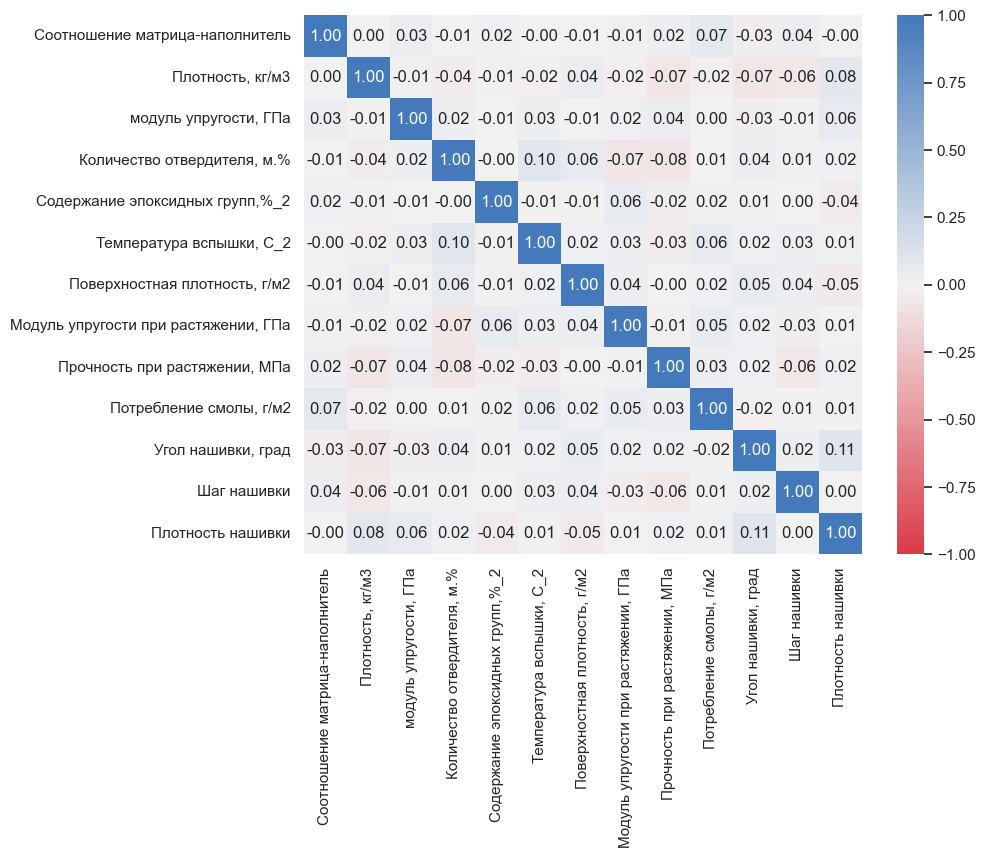

In [21]:
#Посмотрим матрицу корреляции
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(9, 7))
cmap_ = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, vmin=-1, vmax=1, ax=ax, cmap=cmap_,annot=True,fmt='.2f')
plt.show()

# min\max
корреляция признаков практически отсутствует

